# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
import pandas as pd
import json
import requests
import random
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
from api_keys import weather_api_key
from citipy import citipy

## Generate Cities List

In [2]:
city_list=[]
city_data=[]

In [3]:
for city in range(2000):
    lat=random.randrange(-90,90)
    lng=random.randrange(-180,180)
    city = citipy.nearest_city(lat,lng)
    city_list.append(city.city_name)

len(city_list)

2000

In [4]:
# Drop duplicate cities from city list
city_list = list(set(city_list))
len(city_list)

744

In [5]:
City=[]
Lat=[]
Lng=[]
Max_Temp=[]
Humidity=[]
Cloudiness=[]
Wind_Speed=[]
Country=[]
Date=[]

#data={"City":[City],"Lat":[Lat],"Lng":[Lng],"Max_Temp":[Max_Temp],"Humidity":[Humidity],"Cloudiness":[Cloudiness],"Wind_Speed":[Wind_Speed],"Country":[Country],"Date":[Date]}


In [6]:
url = "http://api.openweathermap.org/data/2.5/weather?"

#Build query URL
city="petaluma"   
    
query_url = url + "appid=" + weather_api_key + "&q=" + city
print(f"Getting data for {city}")
weather_response = requests.get(query_url)
weather_json = weather_response.json()
weather_json

Getting data for petaluma


{'coord': {'lon': -122.64, 'lat': 38.23},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01d'}],
 'base': 'stations',
 'main': {'temp': 299.28,
  'feels_like': 295.14,
  'temp_min': 297.04,
  'temp_max': 300.93,
  'pressure': 1016,
  'humidity': 44},
 'visibility': 10000,
 'wind': {'speed': 7.2, 'deg': 250, 'gust': 10.8},
 'clouds': {'all': 1},
 'dt': 1600988010,
 'sys': {'type': 1,
  'id': 5152,
  'country': 'US',
  'sunrise': 1600956033,
  'sunset': 1600999448},
 'timezone': -25200,
 'id': 5382232,
 'name': 'Petaluma',
 'cod': 200}

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
# define url
url = "http://api.openweathermap.org/data/2.5/weather?"

# city counter 
x=1

# retrieve city data from url
for city in city_list:    
    query_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=" + "imperial"
    try:
        print(f"Getting data for city #{x}|{city}")
        
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
        
        City.append(weather_json['name'])
        Lat.append(weather_json['coord']['lat'])
        Lng.append(weather_json['coord']['lon'])
        Max_Temp.append(weather_json['main']['temp_max'])
        Humidity.append(weather_json['main']['humidity'])
        Cloudiness.append(weather_json['clouds']['all'])
        Wind_Speed.append(weather_json['wind']['speed'])
        Country.append(weather_json['sys']['country'])
        Date.append(weather_json['dt'])
        x=x+1
    except:
        print("data not found")

Getting data for city #1|dhuburi
Getting data for city #2|springbok
Getting data for city #3|torbay
Getting data for city #4|ponta do sol
Getting data for city #5|karonga
Getting data for city #6|hihifo
data not found
Getting data for city #6|dhidhdhoo
Getting data for city #7|margate
Getting data for city #8|hvide sande
Getting data for city #9|geraldton
Getting data for city #10|hvammstangi
data not found
Getting data for city #10|yafran
Getting data for city #11|malakal
Getting data for city #12|le mars
Getting data for city #13|bom jesus
Getting data for city #14|mahon
Getting data for city #15|gornopravdinsk
Getting data for city #16|the pas
Getting data for city #17|mys shmidta
data not found
Getting data for city #17|casa grande
Getting data for city #18|muyezerskiy
Getting data for city #19|kaeo
Getting data for city #20|griffith
Getting data for city #21|kismayo
Getting data for city #22|ostrovnoy
Getting data for city #23|khatanga
Getting data for city #24|talnakh
Getting dat

Getting data for city #209|amarante do maranhao
Getting data for city #210|naberera
Getting data for city #211|anchorage
Getting data for city #212|galeana
Getting data for city #213|itarema
Getting data for city #214|arivonimamo
Getting data for city #215|buchanan
Getting data for city #216|lao cai
Getting data for city #217|luorong
Getting data for city #218|panaba
Getting data for city #219|sfantu gheorghe
Getting data for city #220|toba
Getting data for city #221|iquique
Getting data for city #222|ivybridge
Getting data for city #223|barahona
Getting data for city #224|olonets
Getting data for city #225|touros
Getting data for city #226|hirara
Getting data for city #227|attawapiskat
data not found
Getting data for city #227|klaksvik
Getting data for city #228|aykhal
Getting data for city #229|show low
Getting data for city #230|port augusta
Getting data for city #231|charters towers
Getting data for city #232|kamenskoye
data not found
Getting data for city #232|nuuk
Getting data fo

Getting data for city #408|ibra
Getting data for city #409|oranjemund
Getting data for city #410|lolua
data not found
Getting data for city #410|ketchikan
Getting data for city #411|awbari
Getting data for city #412|benguela
Getting data for city #413|grand river south east
data not found
Getting data for city #413|adrar
Getting data for city #414|werda
Getting data for city #415|chau doc
Getting data for city #416|moba
Getting data for city #417|alice
Getting data for city #418|khorixas
Getting data for city #419|salamanca
Getting data for city #420|galiwinku
data not found
Getting data for city #420|nazarovo
Getting data for city #421|havoysund
Getting data for city #422|praia da vitoria
Getting data for city #423|yellowknife
Getting data for city #424|biltine
Getting data for city #425|sambava
Getting data for city #426|cayenne
Getting data for city #427|vanavara
Getting data for city #428|kazalinsk
data not found
Getting data for city #428|bandarbeyla
Getting data for city #429|tab

Getting data for city #613|potsdam
Getting data for city #614|gedinne
Getting data for city #615|nara
Getting data for city #616|kimberley
Getting data for city #617|nouadhibou
Getting data for city #618|bloomfield
Getting data for city #619|kruisfontein
Getting data for city #620|diu
Getting data for city #621|mineiros
Getting data for city #622|ambanja
Getting data for city #623|atuona
Getting data for city #624|acapulco
Getting data for city #625|rantepao
Getting data for city #626|ellensburg
Getting data for city #627|aden
Getting data for city #628|palabuhanratu
data not found
Getting data for city #628|oxford
Getting data for city #629|taolanaro
data not found
Getting data for city #629|koutiala
Getting data for city #630|cumaribo
data not found
Getting data for city #630|mpika
Getting data for city #631|kupang
Getting data for city #632|airai
Getting data for city #633|iraray
Getting data for city #634|san quintin
Getting data for city #635|henties bay
Getting data for city #636

In [8]:
# create dataframe from city data
data={"City":City,"Lat":Lat,"Lng":Lng,"Max_Temp":Max_Temp,"Humidity":Humidity,"Cloudiness":Cloudiness,"Wind_Speed":Wind_Speed,"Country":Country,"Date":Date}
data_df=pd.DataFrame(data, columns=['City','Lat','Lng','Max_Temp','Humidity','Cloudiness','Wind_Speed','Country','Date'])
data_df

,City,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date
0,Dhubri,26.03,89.97,77.79,94,100,5.03,IN,1600988144
1,Springbok,-29.66,17.89,49.71,80,0,4.85,ZA,1600988144
2,Torbay,47.67,-52.73,60.01,82,20,21.92,CA,1600987835
3,Ponta do Sol,32.67,-17.10,73.40,78,20,4.70,PT,1600987929
4,Karonga,-9.93,33.93,70.74,66,1,4.63,MW,1600988145
...,...,...,...,...,...,...,...,...,...
682,Jalu,29.03,21.55,81.25,31,0,4.81,LY,1600988324
683,Hofn,64.25,-15.21,37.69,73,50,18.97,IS,1600987802
684,Shitanjing,39.23,106.34,55.96,53,88,5.41,CN,1600988324
685,Evanston,42.04,-87.69,78.01,53,47,7.20,US,1600988324


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
# Export city data into .csv file
data_df.to_csv (r'..\output_data\cities_data.csv', index = False, header=True)

# Display dataframe
data_df

,City,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date
0,Dhubri,26.03,89.97,77.79,94,100,5.03,IN,1600988144
1,Springbok,-29.66,17.89,49.71,80,0,4.85,ZA,1600988144
2,Torbay,47.67,-52.73,60.01,82,20,21.92,CA,1600987835
3,Ponta do Sol,32.67,-17.10,73.40,78,20,4.70,PT,1600987929
4,Karonga,-9.93,33.93,70.74,66,1,4.63,MW,1600988145
...,...,...,...,...,...,...,...,...,...
682,Jalu,29.03,21.55,81.25,31,0,4.81,LY,1600988324
683,Hofn,64.25,-15.21,37.69,73,50,18.97,IS,1600987802
684,Shitanjing,39.23,106.34,55.96,53,88,5.41,CN,1600988324
685,Evanston,42.04,-87.69,78.01,53,47,7.20,US,1600988324


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
# Drop city with humidity over 100%
data_clean=data_df.drop( data_df[ data_df['Humidity'] > 100 ].index , inplace=False)
data_clean

,City,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date
0,Dhubri,26.03,89.97,77.79,94,100,5.03,IN,1600988144
1,Springbok,-29.66,17.89,49.71,80,0,4.85,ZA,1600988144
2,Torbay,47.67,-52.73,60.01,82,20,21.92,CA,1600987835
3,Ponta do Sol,32.67,-17.10,73.40,78,20,4.70,PT,1600987929
4,Karonga,-9.93,33.93,70.74,66,1,4.63,MW,1600988145
...,...,...,...,...,...,...,...,...,...
682,Jalu,29.03,21.55,81.25,31,0,4.81,LY,1600988324
683,Hofn,64.25,-15.21,37.69,73,50,18.97,IS,1600987802
684,Shitanjing,39.23,106.34,55.96,53,88,5.41,CN,1600988324
685,Evanston,42.04,-87.69,78.01,53,47,7.20,US,1600988324


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

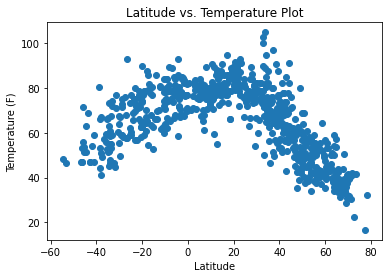

In [14]:
plt.scatter(data_clean["Lat"], data_clean["Max_Temp"])
plt.title("Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")

plt.show()

## Latitude vs. Humidity Plot

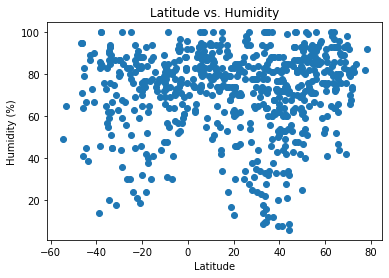

In [15]:
plt.scatter(data_clean["Lat"], data_clean["Humidity"])
plt.title("Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.show()

## Latitude vs. Cloudiness Plot

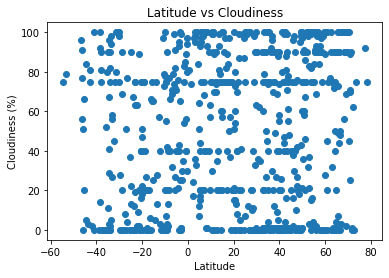

In [16]:
plt.scatter(data_clean["Lat"], data_clean["Cloudiness"])
plt.title("Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.show()

## Latitude vs. Wind Speed Plot

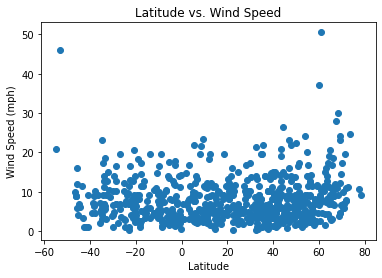

In [17]:
plt.scatter(data_clean["Lat"], data_clean["Wind_Speed"])
plt.title("Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.show()

## Linear Regression

In [20]:
north_df=data_df.drop(data_df[data_df['Lat']<0].index,inplace=False)
south_df=data_df.drop(data_df[data_df['Lat']>0].index,inplace=False)
print(f"{len(north_df)} cities in our sample list are in the northern hemisphere")
print(f"{len(south_df)} cities in our sample list are in the southern hemisphere")

481 cities in our list are in the northern hemisphere
206 cities in our list are in the southern hemisphere


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

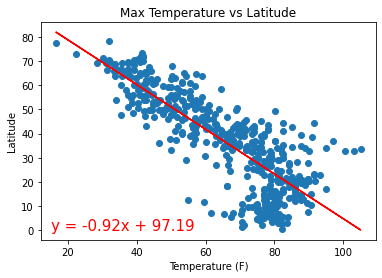

In [43]:
plt.scatter(north_df["Max_Temp"], north_df["Lat"])
plt.title("Max Temperature vs Latitude")
plt.ylabel("Latitude")
plt.xlabel("Temperature (F)")

#Calculate regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_df["Max_Temp"], north_df["Lat"])
regress_values = north_df["Max_Temp"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Calculate Pearson's correlation coefficient
correlation = st.pearsonr(north_df["Max_Temp"],north_df["Lat"])

#Plot regression
plt.plot(north_df["Max_Temp"],regress_values,"r-")
plt.annotate(line_eq,(15,0),fontsize=15,color="red")

plt.show()

In [ ]:
#Calculate regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_df["Max_Temp"], north_df["Lat"])
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Calculate Pearson's correlation coefficient
correlation = st.pearsonr(weight,avg_vol)

#Plot regression
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(15,0),fontsize=15,color="red")


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

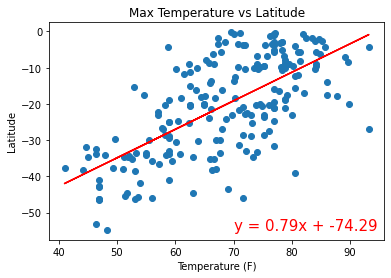

In [55]:
plt.scatter(south_df["Max_Temp"], south_df["Lat"])
plt.title("Max Temperature vs Latitude")
plt.ylabel("Latitude")
plt.xlabel("Temperature (F)")

#Calculate regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_df["Max_Temp"], south_df["Lat"])
regress_values = south_df["Max_Temp"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Calculate Pearson's correlation coefficient
correlation = st.pearsonr(south_df["Max_Temp"], south_df["Lat"])

#Plot regression
plt.plot(south_df["Max_Temp"],regress_values,"r-")
plt.annotate(line_eq,(70,-55),fontsize=15,color="red")

plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

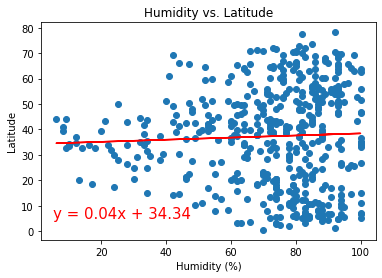

In [57]:
plt.scatter(north_df["Humidity"], north_df["Lat"])
plt.title("Humidity vs. Latitude")
plt.ylabel("Latitude")
plt.xlabel("Humidity (%)")

#Calculate regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_df["Humidity"], north_df["Lat"])
regress_values = north_df["Humidity"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Calculate Pearson's correlation coefficient
correlation = st.pearsonr(north_df["Humidity"],north_df["Lat"])

#Plot regression
plt.plot(north_df["Humidity"],regress_values,"r-")
plt.annotate(line_eq,(5,5),fontsize=15,color="red")


plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

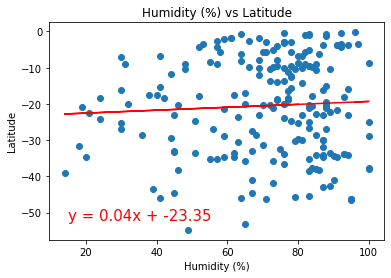

In [69]:
plt.scatter(south_df["Humidity"], south_df["Lat"])
plt.title("Humidity (%) vs Latitude")
plt.ylabel("Latitude")
plt.xlabel("Humidity (%)")

#Calculate regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_df["Humidity"], south_df["Lat"])
regress_values = south_df["Humidity"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Calculate Pearson's correlation coefficient
correlation = st.pearsonr(south_df["Humidity"],south_df["Lat"])

#Plot regression
plt.plot(south_df["Humidity"],regress_values,"r-")
plt.annotate(line_eq,(15, -52),fontsize=15,color="red")


plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

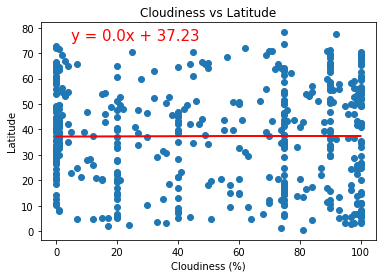

In [72]:
plt.scatter(north_df["Cloudiness"], north_df["Lat"])
plt.title("Cloudiness vs Latitude")
plt.ylabel("Latitude")
plt.xlabel("Cloudiness (%)")

#Calculate regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_df["Cloudiness"], north_df["Lat"])
regress_values = north_df["Cloudiness"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Calculate Pearson's correlation coefficient
correlation = st.pearsonr(north_df["Cloudiness"],north_df["Lat"])

#Plot regression
plt.plot(north_df["Cloudiness"],regress_values,"r-")
plt.annotate(line_eq,(5, 75),fontsize=15,color="red")

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

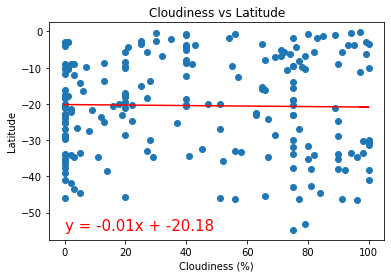

In [75]:
plt.scatter(south_df["Cloudiness"], south_df["Lat"])
plt.title("Cloudiness vs Latitude")
plt.ylabel("Latitude")
plt.xlabel("Cloudiness (%)")

#Calculate regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_df["Cloudiness"], south_df["Lat"])
regress_values = south_df["Cloudiness"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Calculate Pearson's correlation coefficient
correlation = st.pearsonr(south_df["Cloudiness"],south_df["Lat"])

#Plot regression
plt.plot(south_df["Cloudiness"],regress_values,"r-")
plt.annotate(line_eq,(0, -55),fontsize=15,color="red")

plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

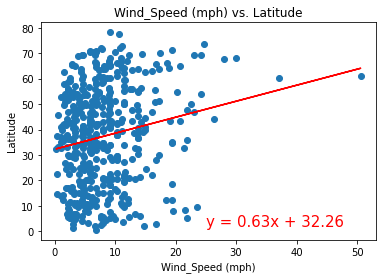

In [79]:
# Generate scatter plot
plt.scatter(north_df["Wind_Speed"], north_df["Lat"])
plt.title("Wind_Speed (mph) vs. Latitude")
plt.xlabel("Wind_Speed (mph)")
plt.ylabel("Latitude")

# Calculate regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_df["Wind_Speed"], north_df["Lat"])
regress_values = north_df["Wind_Speed"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Calculate Pearson's coefficient
correWind_Speedion = st.pearsonr(north_df["Wind_Speed"],north_df["Lat"])

# Plot regression
plt.plot(north_df["Wind_Speed"],regress_values,"r-")
plt.annotate(line_eq,(25, 2),fontsize=15,color="red")

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

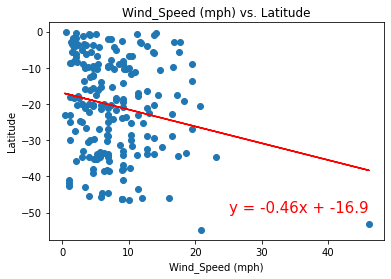

In [82]:
# Generate scatter plot
plt.scatter(south_df["Wind_Speed"], south_df["Lat"])
plt.title("Wind_Speed (mph) vs. Latitude")
plt.xlabel("Wind_Speed (mph)")
plt.ylabel("Latitude")

# Calculate regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_df["Wind_Speed"], south_df["Lat"])
regress_values = south_df["Wind_Speed"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Calculate Pearson's coefficient
correWind_Speedion = st.pearsonr(south_df["Wind_Speed"],south_df["Lat"])

# Plot regression
plt.plot(south_df["Wind_Speed"],regress_values,"r-")
plt.annotate(line_eq,(25, -50),fontsize=15,color="red")

plt.show()